# 1. Setting up the environment

## 1.1 Checking if the notebook was launched in the correct environment

In [1]:
#prints the available list of environments with asterisk (*) next to the current environment
#need to relaunch jupyter if launched in incorrect environment
!conda env list

# conda environments:
#
base                     C:\Users\Sarthak\anaconda3
prom02_env            *  C:\Users\Sarthak\anaconda3\envs\prom02_env
prot_env                 C:\Users\Sarthak\anaconda3\envs\prot_env



## 1.2 Installing the required packages in the environment

In [2]:
#prints the list of installed packages in the environment
#useful for checking versions and confirming if the packages have successfully installed
!conda list

# packages in environment at C:\Users\Sarthak\anaconda3\envs\prom02_env:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                     eigen  
absl-py                   0.13.0           py38haa95532_0  
aiohttp                   3.7.4            py38h2bbff1b_1  
argon2-cffi               20.1.0           py38h2bbff1b_1  
astor                     0.8.1            py38haa95532_0  
astunparse                1.6.3                      py_0  
async-timeout             3.0.1            py38haa95532_0  
async_generator           1.10               pyhd3eb1b0_0  
attrs                     21.2.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl  
bleach                    4.0.0              pyhd3eb1b0_0  
blinker                   1.4              py38haa95532_0  
blosc                     1.21.0               h19a0ad4_0  
bottleneck        

In [3]:
#installing the required packages
import sys
!conda install --yes --prefix {sys.prefix} numpy
!conda install --yes --prefix {sys.prefix} pandas
!conda install --yes --prefix {sys.prefix} matplotlib
!conda install --yes --prefix {sys.prefix} scikit-learn
!conda install --yes --prefix {sys.prefix} scikit-image
!conda install --yes --prefix {sys.prefix} opencv
!conda install --yes --prefix {sys.prefix} pickle5

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Sarthak\anaconda3\envs\prom02_env

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    threadpoolctl-2.2.0        |     pyhbf3da8f_0          16 KB
    ------------------------------------------------------------
                                           Total:          16 KB

The following NEW packages will be INSTALLED:

  icc_rt             pkgs/main/win-64::icc_rt-2019.0.0-h0cc432a_1
  joblib             pkgs/main/noarch::joblib-1.0.1-pyhd3eb1b0_0
  scikit-learn       pkgs/main/win-64::scikit-lea


Examining @/win-64::__archspec==1=x86_64:  80%|########  | 4/5 [00:00<00:00, 16.76it/s]
                                                                                       

Examining conflict for python pickle5:   0%|          | 0/5 [00:00<?, ?it/s]
                                                                            

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - pickle5 -> python[version='>=3.6,<3.7.0a0|>=3.7,<3.8.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you explicitly specify
that.





## 1.3 Importing the installed packages in the environment

In [3]:
#importing the packages in the environment for use

import glob #module for matching pathnames to a specified pattern
import os #module allowing interaction with the file system
import random #module's sample function to randomly select a file from a list of files
import shutil #module offering a number of high-level operations on files such as move or copy
import time #module to handle time-related tasks such as model training time etc.

import numpy as np #module for added support to large, multi-dimensional arrays
import pandas as pd #module for data manipulation and analysis 
import matplotlib.pyplot as plt #library for creating visualizations

import cv2 #real-time optimized Computer Vision library

from sklearn.svm import SVC #module for classifier SVM
from sklearn.ensemble import RandomForestClassifier #module for classifier Random Forest
from sklearn.neighbors import KNeighborsClassifier #module for classifier K-Nearest Neighbor

from skimage.feature import hog #module for feature descriptor method - HOG (Histogram of Oriented Gradients)

from sklearn import metrics #module for performance metrics

#metrics to score the models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

import statistics as stat #for calculating average for the scores over 3 datasets

import pickle #module for exporting the model

In [4]:
#seting the backend of matplotlib to the 'inline' backend, so the plots are shown in the notebook
%matplotlib inline

# 2. Declaring variables, constants for paths and regex patterns

In [5]:
CAT_DIR = 'MRL_DS_CAT' #directory where the images are categorised by state i.e., open or closed
SUB_DIR = 'PART_' #sub-directory where files are stored for different datasets

OPEN_DIR = 'OPEN_EYES' #directory where images for open-state for subjects are kept
CLOSED_DIR = 'CLOSED_EYES' #directory where images for closed-state for subjects are kept

IMG_DEF_SIZE = 80 #default size for images

IMG_MIN_SIZE = 80 #default size for images
IMG_MAX_SIZE = 224 #default size for images

In [6]:
open_eye_regex = '*_?_?_1_?_?_*.png' #regex pattern for open eye-state files
closed_eye_regex = '*_?_?_0_?_?_*.png' #regex pattern for closed eye-state files

In [7]:
#feature label constants - FAST, Harris Corner, HOG
NO_FEATURE = "na"
FAST = "fs"
HARRIS = "ch"
HOG = "hg"

# 3. Defining functions for miscellaneous operations

## 3.1 Function to load the dataset(s) for training

In [8]:
def load_dataset(image_label, path, image_size):
    dataset = []
    
    #allocating files to either closed or open state
    for eye_state in image_label:
        #joining file path with eye state (sub-directory)
        file_path = os.path.join(f'{path}', eye_state)
        #storing eye-state information to use as label
        class_num = image_label.index(eye_state)
        
        #looping through all images in the path
        for image in os.listdir(file_path):
            try:
                #reading the image in grayscale
                image_array = cv2.imread(os.path.join(file_path, image), cv2.IMREAD_GRAYSCALE)
                #converting back to RGB format
                image_back2rgb = cv2.cvtColor(image_array, cv2.COLOR_GRAY2RGB)
                #resizing the image to get optimal results
                image_resized = cv2.resize(image_back2rgb, (image_size, image_size))
                #lastly, append to an array
                dataset.append([image_resized, class_num])
            except Exception as e:
                pass
    
    #adding column names and coverting the array to dataframe for easy use
    dataset = pd.DataFrame(dataset,columns=['image','label'],index = None)
    return dataset

## 3.2 Function to split the dataset into training and testing

In [9]:
def split_dataset(dataset):
    #splitting the dataset into training i.e., 70% and testing data i.e., 30%
    training_dataset = dataset.sample(frac=0.7, random_state=25)
    testing_dataset = dataset.drop(training_dataset.index)

    return training_dataset, testing_dataset

## 3.3 Function to split the training and testing datasets into X_train, y_train and X_test, y_test

In [10]:
def split_xy(feature_label, dataset):
    X = []
    y = []

    #splitting training/testing datasets again into X_train/X_test and y_train/y_test respectively
    #Raw Pixel approach
    if feature_label == "na":
        for index, row in dataset.iterrows():
            X.append(row["image"])
            y.append(row["label"])
        
        #normalizing image inputs
        X = np.array(X, dtype='float')
        X = X/255.0
        
        #dimensionality reduction
        dim_count = X.ndim
        X_reduced = 1
        if dim_count>2:
            for i in range (1, dim_count):
                X_reduced *= X.shape[i]

        X = X.reshape(X.shape[0], X_reduced)
    
    #FAST method approach
    elif feature_label == "fs":
        for index, row in dataset.iterrows():
            X.append(get_fast(row["image"]))
            y.append(row["label"])
            
        X = np.vstack(np.array(X))
        
        #normalizing image inputs
        scaler = MinMaxScaler(feature_range=(0,1))
        X = scaler.fit_transform(X)       
    
    #Harris Corner method approach
    elif feature_label == "ch":
        for index, row in dataset.iterrows():
            X.append(get_harris(row["image"]))
            y.append(row["label"])
        
        #normalizing image inputs
        X = np.array(X, dtype='float')
        X = X/255.0
        
        #dimensionality reduction
        dim_count = X.ndim
        X_reduced = 1
        if dim_count>2:
            for i in range (1, dim_count):
                X_reduced *= X.shape[i]

        X = X.reshape(X.shape[0], X_reduced)
    
    #HOG method approach
    elif feature_label == "hg":
        for index, row in dataset.iterrows():
            X.append(get_hog(row["image"]))
            y.append(row["label"])
            
    return X, y

## 3.4 Function to train the models

In [11]:
def train_model(label, X_train, y_train):
    #storing model training start time
    start_time = time.time()
    
    #SVM model initialisation
    if label == 'svm':
        #with probability=False SVM is faster, so used to get threshhold
        #however, to get roc_auc score it needs to be 'True'
        #model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', probability=False)
        model = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', probability=True)
    #RF model initialisation
    elif label == 'rf':
        model = RandomForestClassifier(n_estimators=100, random_state=None)
    #KNN model initialisation
    elif label == 'knn':
        model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    
    #fitting training data in the model
    model.fit(X_train, y_train)
    #calculating elapsed time in seconds since the start of training process
    elapsed_time = time.time() - start_time
    
    return model, round(elapsed_time), time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

## 3.5 Function for feature extraction/description

In [12]:
def get_fast(image):
    #converting image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    #initialising fast detector
    fast = cv2.FastFeatureDetector_create()
    #initialising brief descriptor
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()
    
    #detecting keypoints in the image
    kp_fast = fast.detect(gray_image, None)
    #computing descriptors based on keypoints
    kp_fast, ds_fast = brief.compute(gray_image, kp_fast)
    
    return ds_fast

In [13]:
def get_harris(image):
    
    #converting image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    #storing image as float
    gray_image = np.float32(gray_image)
    #calculating corners
    dst = cv2.cornerHarris(gray_image, 2, 3, 0.04)
    #result is dilated for marking the corners
    dst = cv2.dilate(dst, None)
    
    return dst

In [14]:
def get_hog(image):
    #creating hog features and hog image
    fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
    return fd

## 3.6 Functions for image-preprocessing tasks (future works)

In [15]:
#function to increase contrast on the image 
def hist(img):
    img_to_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV)
    img_to_yuv[:,:,0] = cv2.equalizeHist(img_to_yuv[:,:,0])
    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR)
    return hist_equalization_result

In [16]:
#function to display results post image segmentation
def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

# 4. Organising the samples in datasets per eye-states

## 4.1 Getting the path for random part-datasets

In [17]:
#gets all the sub-directories matching the pattern specified i.e., ending in 'PART_'
sub_dir_list = glob.glob(f'{CAT_DIR}\\{SUB_DIR}*')

In [18]:
#verifying all the paths
print(sub_dir_list)

['MRL_DS_CAT\\PART_1', 'MRL_DS_CAT\\PART_2', 'MRL_DS_CAT\\PART_3']


## 4.2 Categorising the dataset(s) based on the eye-state i.e., open and closed

In [19]:
#open eye-state images are being sorted
for s in sub_dir_list:
    #check if the OPEN_EYES folder exists, if not, create it
    if not os.path.exists(f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{OPEN_DIR}'): os.makedirs(f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{OPEN_DIR}')
    for filename in glob.glob(f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{open_eye_regex}'):
        #move all images matching 'open_eye_regex'
        shutil.move(filename, f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{OPEN_DIR}\\{os.path.split(filename)[-1]}')

In [20]:
#closed eye-state images are being sorted
for s in sub_dir_list:
    #check if the CLOSED_EYES folder exists, if not, create it
    if not os.path.exists(f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{CLOSED_DIR}'): os.makedirs(f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{CLOSED_DIR}')
    for filename in glob.glob(f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{closed_eye_regex}'):        
        #move all images matching 'closed_eye_regex'
        shutil.move(filename, f'{CAT_DIR}\\{os.path.split(s)[-1]}\\{CLOSED_DIR}\\{os.path.split(filename)[-1]}')

# 5. Processing a few sample images (per eye-state)

## 5.1 Image pre-processing tasks such as gray-scaling, resizing etc.

In [79]:
#picking up a random image
random_file_open = random.choice(os.listdir(f'{sub_dir_list[0]}\\{OPEN_DIR}'))
random_file_closed = random.choice(os.listdir(f'{sub_dir_list[0]}\\{CLOSED_DIR}'))

img_open_fullpath = os.path.join(f'{sub_dir_list[0]}\\{OPEN_DIR}', random_file_open)
img_closed_fullpath = os.path.join(f'{sub_dir_list[0]}\\{CLOSED_DIR}', random_file_closed)

print(f'File location for image (open): {img_open_fullpath}')
print(f'File location for image (closed): {img_closed_fullpath}')

File location for image (open): MRL_DS_CAT\PART_1\OPEN_EYES\s0037_09713_1_1_1_0_0_01.png
File location for image (closed): MRL_DS_CAT\PART_1\CLOSED_EYES\s0012_02557_0_1_0_1_1_01.png


Dimension of image (open) are: (67, 67, 3)
Dimension of image (closed) are: (114, 114, 3)


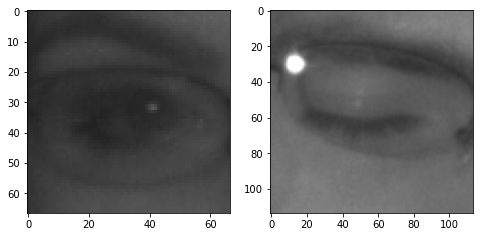

In [80]:
#viewing image using opencv
img_open = cv2.imread(img_open_fullpath)
img_closed = cv2.imread(img_closed_fullpath)

print(f'Dimension of image (open) are: {img_open.shape}')
print(f'Dimension of image (closed) are: {img_closed.shape}')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 8))
axes[0].imshow(img_open)
axes[1].imshow(img_closed)

Dimension of image (open) are: (67, 67, 3)
Dimension of image (closed) are: (114, 114, 3)


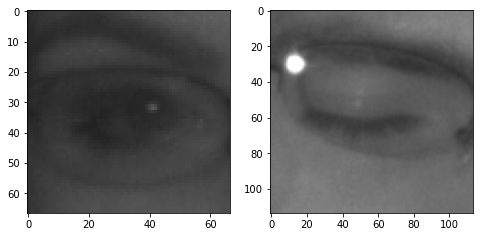

In [81]:
#loading image in grayscale
img_open_gray = cv2.imread(img_open_fullpath, cv2.IMREAD_GRAYSCALE)
img_closed_gray = cv2.imread(img_closed_fullpath, cv2.IMREAD_GRAYSCALE)

img_open_back2rgb = cv2.cvtColor(img_open_gray, cv2.COLOR_GRAY2RGB)
img_closed_back2rgb = cv2.cvtColor(img_closed_gray, cv2.COLOR_GRAY2RGB)

print(f'Dimension of image (open) are: {img_open_back2rgb.shape}')
print(f'Dimension of image (closed) are: {img_closed_back2rgb.shape}')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 8))
axes[0].imshow(img_open_back2rgb, cmap="gray")
axes[1].imshow(img_closed_back2rgb, cmap="gray")

Dimension of image (open) are: (80, 80, 3)
Dimension of image (closed) are: (80, 80, 3)


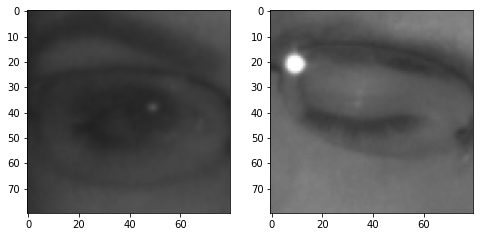

In [82]:
#resizing the image
img_open_resized = cv2.resize(img_open_back2rgb, (IMG_DEF_SIZE, IMG_DEF_SIZE))
img_closed_resized = cv2.resize(img_closed_back2rgb, (IMG_DEF_SIZE, IMG_DEF_SIZE))

print(f'Dimension of image (open) are: {img_open_resized.shape}')
print(f'Dimension of image (closed) are: {img_closed_resized.shape}')

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 8))
axes[0].imshow(img_open_resized, cmap="gray")
axes[1].imshow(img_closed_resized, cmap="gray")

## 5.2 Further image pre-processing tasks such as segmentation and morphological transformation.

In [83]:
#making a copy of images
segmented_open = np.copy(img_open_resized)
segmented_closed = np.copy(img_closed_resized)

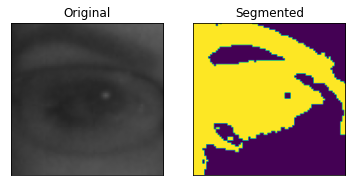

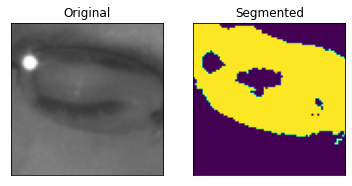

In [84]:
# Segmentation
gray_open = cv2.cvtColor(segmented_open, cv2.COLOR_RGB2GRAY)
gray_closed = cv2.cvtColor(segmented_closed, cv2.COLOR_RGB2GRAY)

ret_open, thresh_open = cv2.threshold(gray_open, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
ret_closed, thresh_closed = cv2.threshold(gray_closed, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Displaying segmented images
display(segmented_open, thresh_open, 'Original', 'Segmented')
display(segmented_closed, thresh_closed, 'Original', 'Segmented')

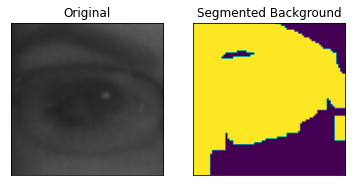

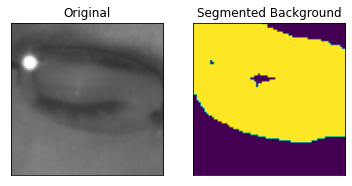

In [85]:
# Further noise removal
kernel = np.ones((3, 3), np.uint8)

opening_open = cv2.morphologyEx(thresh_open, cv2.MORPH_OPEN, kernel, iterations=2)
opening_closed = cv2.morphologyEx(thresh_closed, cv2.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg_open = cv2.dilate(opening_open, kernel, iterations=3)
sure_bg_closed = cv2.dilate(opening_closed, kernel, iterations=3)

# Finding sure foreground area
dist_transform_open = cv2.distanceTransform(opening_open, cv2.DIST_L2, 5)
dist_transform_closed = cv2.distanceTransform(opening_closed, cv2.DIST_L2, 5)

ret_open, sure_fg_open = cv2.threshold(dist_transform_open, 0.7 * dist_transform_open.max(), 255, 0)
ret_closed, sure_fg_closed = cv2.threshold(dist_transform_closed, 0.7 * dist_transform_closed.max(), 255, 0)

# Finding unknown region
sure_fg_open = np.uint8(sure_fg_open)
sure_fg_closed = np.uint8(sure_fg_closed)

unknown_open = cv2.subtract(sure_bg_open, sure_fg_open)
unknown_closed = cv2.subtract(sure_bg_closed, sure_fg_closed)

#Displaying segmented back ground
display(segmented_open, sure_bg_open, 'Original', 'Segmented Background')
display(segmented_closed, sure_bg_closed, 'Original', 'Segmented Background')

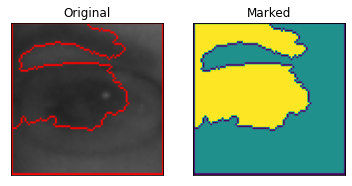

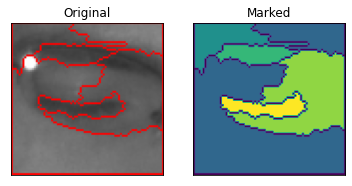

In [86]:
# Marker labelling
ret_open, markers_open = cv2.connectedComponents(sure_fg_open)
ret_closed, markers_closed = cv2.connectedComponents(sure_fg_closed)

# Add one to all labels so that sure background is not 0, but 1
markers_open = markers_open + 1
markers_closed = markers_closed + 1

# Now, mark the region of unknown with zero
markers_open[unknown_open == 255] = 0
markers_closed[unknown_closed == 255] = 0

markers_open = cv2.watershed(segmented_open, markers_open)
markers_closed = cv2.watershed(segmented_closed, markers_closed)
segmented_open[markers_open == -1] = [255, 0, 0]
segmented_closed[markers_closed == -1] = [255, 0, 0]

# Displaying markers on the image
display(segmented_open, markers_open, 'Original', 'Marked')
display(segmented_closed, markers_closed, 'Original', 'Marked')

## 5.3 Feature extraction and description

### 5.3.1 Features from Accelerated Segment Test (FAST)

In [87]:
#getting keypoints on the sample images
fast = cv2.FastFeatureDetector_create()
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

kp_fast_open = fast.detect(img_open_resized, None)
kp_fast_closed = fast.detect(img_closed_resized, None)

kp_fast_open, ds_fast_open = brief.compute(img_open_resized, kp_fast_open)
kp_fast_closed, ds_fast_closed = brief.compute(img_closed_resized, kp_fast_closed)

img_fast_open = cv2.drawKeypoints(img_open_resized, kp_fast_open, None, color=(255,0,0))
img_fast_closed = cv2.drawKeypoints(img_closed_resized, kp_fast_closed, None, color=(255,0,0))

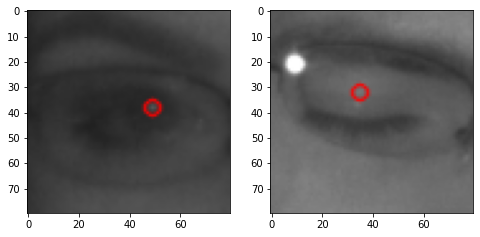

In [88]:
#displaying images
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 8))
axes[0].imshow(img_fast_open, cmap="gray")
axes[1].imshow(img_fast_closed, cmap="gray")

### 5.3.2 Harris Corner

In [89]:
#getting keypoints on the sample images
harris_open = np.copy(img_open_resized)
harris_closed = np.copy(img_closed_resized)

gray_open = cv2.cvtColor(harris_open,cv2.COLOR_BGR2GRAY)
gray_closed = cv2.cvtColor(harris_closed,cv2.COLOR_BGR2GRAY)

gray_open = np.float32(gray_open)
gray_closed = np.float32(gray_closed)

dst_open = cv2.cornerHarris(gray_open, 2, 3, 0.04)
dst_closed = cv2.cornerHarris(gray_closed, 2, 3, 0.04)

dst_open = cv2.dilate(dst_open, None)
dst_closed = cv2.dilate(dst_closed, None)

harris_open[dst_open>0.01*dst_open.max()]=[0,0,255]
harris_closed[dst_closed>0.01*dst_closed.max()]=[0,0,255]

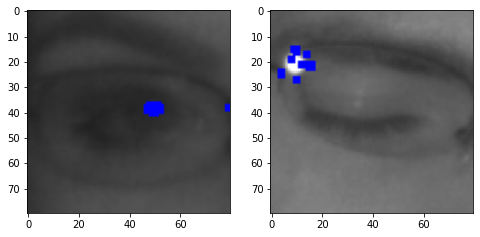

In [90]:
#displaying images
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 8))
axes[0].imshow(harris_open, cmap="gray")
axes[1].imshow(harris_closed, cmap="gray")

### 5.3.3 Histogram of Oriented Gradients (HOG)

In [91]:
#getting feature descriptors off the sample images
fd_open, hog_image_open = hog(img_open_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
fd_closed, hog_image_closed = hog(img_closed_resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)

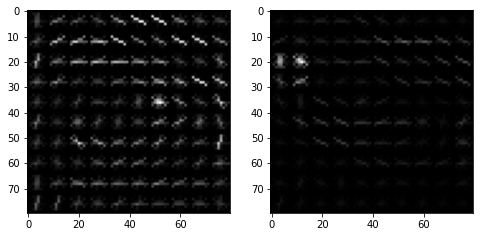

In [92]:
#displaying hog images
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8, 8))
axes[0].imshow(hog_image_open, cmap="gray")
axes[1].imshow(hog_image_closed, cmap="gray")

# 6. Establishing dataset and image size thresholds

## 6.1 Loading dataset with varying size images

In [36]:
#defining classes for training data i.e., eye-state feature
classes = [f'{CLOSED_DIR}', f'{OPEN_DIR}']
print(classes)

['CLOSED_EYES', 'OPEN_EYES']


In [62]:
#using SVM model as default for getting default image size for resizing
svm_accuracy = []

#loop through min and max sizes i.e., 80 and 224 with increment of 8 pixels
for counter in range(IMG_MIN_SIZE, IMG_MAX_SIZE + 1, 8):
    print('Processing samples at size: '+str(counter))
    #loading one of the datasets
    dataset = load_dataset(classes, sub_dir_list[0], counter)
    #creating training and testing datasets
    training_dataset, testing_dataset = split_dataset(dataset)
    #further creating x_train, x_test and y_train, y_test
    X_train, y_train = split_xy(NO_FEATURE, training_dataset)
    X_test, y_test = split_xy(NO_FEATURE, testing_dataset)
    #getting results for SVM model
    svm_model, svm_time, svm_stime = train_model('svm', X_train, y_train)
    #rounding the accuracy for model
    svm_score = round(svm_model.score(X_test, y_test), 4)
    #appending the results for comparison later
    svm_accuracy.append([counter, svm_score, svm_time])
    print('Processing done... Moving to next size.')

#converting array to dataframe for plotting results
svm_accuracy = pd.DataFrame(svm_accuracy,columns=['image_size','accuracy', 'training_time_in_sec'],index = None)

Processing samples at size: 80
Processing done... Moving to next size.
Processing samples at size: 88
Processing done... Moving to next size.
Processing samples at size: 96
Processing done... Moving to next size.
Processing samples at size: 104
Processing done... Moving to next size.
Processing samples at size: 112
Processing done... Moving to next size.
Processing samples at size: 120
Processing done... Moving to next size.
Processing samples at size: 128
Processing done... Moving to next size.
Processing samples at size: 136
Processing done... Moving to next size.
Processing samples at size: 144
Processing done... Moving to next size.
Processing samples at size: 152
Processing done... Moving to next size.
Processing samples at size: 160
Processing done... Moving to next size.
Processing samples at size: 168
Processing done... Moving to next size.
Processing samples at size: 176
Processing done... Moving to next size.
Processing samples at size: 184
Processing done... Moving to next s

In [63]:
#printing out the accuracy for every size, along with training time
svm_accuracy

,image_size,accuracy,training_time_in_sec
0,80,0.9238,6
1,88,0.9238,8
2,96,0.9238,9
3,104,0.9238,10
4,112,0.9238,12
5,120,0.9238,14
6,128,0.9238,17
7,136,0.9238,20
8,144,0.9238,21
9,152,0.9238,23


array([<AxesSubplot:xlabel='Image Sizes (80-224)'>,
       <AxesSubplot:xlabel='Image Sizes (80-224)'>], dtype=object)

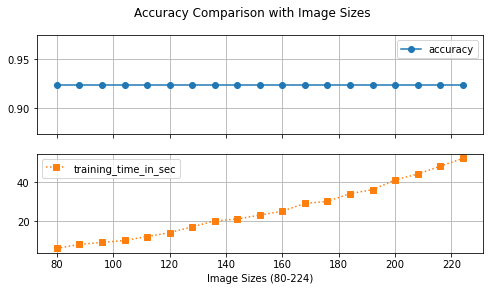

In [64]:
#plotting the graphs to get a clearer picture
svm_accuracy.plot(rot=0, grid=True, style=['o-','s:'], subplots=True, title = 'Accuracy Comparison with Image Sizes', x='image_size', figsize=(8, 4), xlabel='Image Sizes (80-224)')

## 6.2 Training the models with image size threshold

In [70]:
#choosing 2 of the 3 models proposed
dataset = load_dataset(classes, sub_dir_list[0], IMG_DEF_SIZE)
training_dataset, testing_dataset = split_dataset(dataset)
X_train, y_train = split_xy(NO_FEATURE, training_dataset)
X_test, y_test = split_xy(NO_FEATURE, testing_dataset)

In [71]:
#getting results for SVM model
svm_model, svm_time, svm_stime = train_model('svm', X_train, y_train)
svm_score = round(svm_model.score(X_test, y_test), 4)

In [72]:
#getting results for RF model
rf_model, rf_time, rf_stime = train_model('rf', X_train, y_train)
rf_score = round(rf_model.score(X_test, y_test), 4)

In [73]:
#getting results for KNN model
knn_model, knn_time, knn_stime = train_model('knn', X_train, y_train)
knn_score = round(knn_model.score(X_test, y_test), 4)

In [74]:
#comparing accuracies for the models
accuracy_raw_df = []

accuracy_raw_df.append(['svm', svm_score, svm_time])
accuracy_raw_df.append(['rf', rf_score, rf_time])
accuracy_raw_df.append(['knn', knn_score, knn_time])

accuracy_raw_df = pd.DataFrame(accuracy_raw_df,columns=['model_name','accuracy', 'training_time_in_sec'],index = None)

In [75]:
#printing out accuracies for models, along with training time
accuracy_raw_df

,model_name,accuracy,training_time_in_sec
0,svm,0.9238,7
1,rf,0.9222,6
2,knn,0.8801,0


array([<AxesSubplot:xlabel='Name of the model'>,
       <AxesSubplot:xlabel='Name of the model'>], dtype=object)

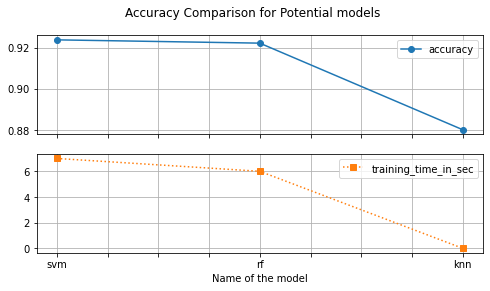

In [76]:
#plotting the graphs to get a clearer picture
accuracy_raw_df.plot.line(rot=0, grid=True, style=['o-','s:'], subplots = True, title = 'Accuracy Comparison for Potential models', x='model_name', figsize=(8 ,4), xlabel='Name of the model')

# 7. Preparing training and testing data for selected models

## 7.1 Loading the datasets

In [77]:
#defining classes for training data i.e., eye-state feature
classes = [f'{CLOSED_DIR}', f'{OPEN_DIR}']
print(classes)

['CLOSED_EYES', 'OPEN_EYES']


In [78]:
#loading all the images in training datasets i.e., PART_1, PART_2, PART_3 etc.
dataset_part1 = load_dataset(classes, sub_dir_list[0], IMG_DEF_SIZE)
dataset_part2 = load_dataset(classes, sub_dir_list[1], IMG_DEF_SIZE)
dataset_part3 = load_dataset(classes, sub_dir_list[2], IMG_DEF_SIZE)

In [79]:
#checking the count for images in datasets
print('Number of images in dataset-1 are: '+str(len(dataset_part1)))
print('Number of images in dataset-2 are: '+str(len(dataset_part2)))
print('Number of images in dataset-3 are: '+str(len(dataset_part3)))

Number of images in dataset-1 are: 2055
Number of images in dataset-2 are: 2055
Number of images in dataset-3 are: 2055


## 7.2 Splitting the datasets into training and testing

In [80]:
#splitting all the dataset into training i.e., 70% and testing data i.e., 30%
training_dataset_part1, testing_dataset_part1 = split_dataset(dataset_part1)
training_dataset_part2, testing_dataset_part2 = split_dataset(dataset_part2)
training_dataset_part3, testing_dataset_part3 = split_dataset(dataset_part3)

In [81]:
#printing the count for train and test split for each dataset
print(f'In dataset 1, training samples are: {training_dataset_part1.shape[0]} and testing samples are: {testing_dataset_part1.shape[0]}')
print(f'In dataset 2, training samples are: {training_dataset_part2.shape[0]} and testing samples are: {testing_dataset_part2.shape[0]}')
print(f'In dataset 3, training samples are: {training_dataset_part3.shape[0]} and testing samples are: {testing_dataset_part3.shape[0]}')

In dataset 1, training samples are: 1438 and testing samples are: 617
In dataset 2, training samples are: 1438 and testing samples are: 617
In dataset 3, training samples are: 1438 and testing samples are: 617


## 7.3 Splitting further into X_train, y_train, X_test and y_test

### 7.3.1 No feature extraction or description i.e., Raw Pixel Approach

In [82]:
#preparing X_train and y_train from the training data - no feature extraction
X_train_part1, y_train_part1 = split_xy(NO_FEATURE, training_dataset_part1)
X_train_part2, y_train_part2 = split_xy(NO_FEATURE, training_dataset_part2)
X_train_part3, y_train_part3 = split_xy(NO_FEATURE, training_dataset_part3)

#preparing X_test and y_test from the testing data - no feature extraction
X_test_part1, y_test_part1 = split_xy(NO_FEATURE, testing_dataset_part1)
X_test_part2, y_test_part2 = split_xy(NO_FEATURE, testing_dataset_part2)
X_test_part3, y_test_part3 = split_xy(NO_FEATURE, testing_dataset_part3)

### 7.3.2 Features from Accelerated Segment Test (FAST)

In [83]:
#preparing X_train and y_train from the training data - FAST
X_train_fs_part1, y_train_fs_part1 = split_xy(FAST, training_dataset_part1)
#X_train_fs_part2, y_train_fs_part2 = split_xy(FAST, training_dataset_part2)
#X_train_fs_part3, y_train_fs_part3 = split_xy(FAST, training_dataset_part3)

#preparing X_test and y_test from the testing data - FAST
X_test_fs_part1, y_test_fs_part1 = split_xy(FAST, testing_dataset_part1)
#X_test_fs_part2, y_test_fs_part2 = split_xy(FAST, testing_dataset_part2)
#X_test_fs_part3, y_test_fs_part3 = split_xy(FAST, testing_dataset_part3)

<ipython-input-60-c2112a63effa>:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.vstack(np.array(X))


ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 1 and the array at index 1 has size 32

### 7.3.3 Harris Corner

In [84]:
#preparing X_train and y_train from the training data - Harris Corner
X_train_hc_part1, y_train_hc_part1 = split_xy(HARRIS, training_dataset_part1)
X_train_hc_part2, y_train_hc_part2 = split_xy(HARRIS, training_dataset_part2)
X_train_hc_part3, y_train_hc_part3 = split_xy(HARRIS, training_dataset_part3)

#preparing X_test and y_test from the testing data - Harris Corner
X_test_hc_part1, y_test_hc_part1 = split_xy(HARRIS, testing_dataset_part1)
X_test_hc_part2, y_test_hc_part2 = split_xy(HARRIS, testing_dataset_part2)
X_test_hc_part3, y_test_hc_part3 = split_xy(HARRIS, testing_dataset_part3)

### 7.3.4 Histogram of Oriented Gradients (HOG)

In [85]:
#preparing X_train and y_train from the training data
X_train_hg_part1, y_train_hg_part1 = split_xy(HOG, training_dataset_part1)
X_train_hg_part2, y_train_hg_part2 = split_xy(HOG, training_dataset_part2)
X_train_hg_part3, y_train_hg_part3 = split_xy(HOG, training_dataset_part3)

#preparing X_test and y_test from the testing data
X_test_hg_part1, y_test_hg_part1 = split_xy(HOG, testing_dataset_part1)
X_test_hg_part2, y_test_hg_part2 = split_xy(HOG, testing_dataset_part2)
X_test_hg_part3, y_test_hg_part3 = split_xy(HOG, testing_dataset_part3)

# 8. Training various models with the dataset(s)

## 8.1 No feature extraction or description i.e., Raw Pixel Approach

### 8.1.1 Support Vector Machine (SVM)

In [122]:
svm_model_part1, svm_time_part1, svm_stime_part1 = train_model('svm', X_train_part1, y_train_part1)
svm_model_part2, svm_time_part2, svm_stime_part2 = train_model('svm', X_train_part2, y_train_part2)
svm_model_part3, svm_time_part3, svm_stime_part3 = train_model('svm', X_train_part3, y_train_part3)

In [123]:
svm_score_part1 = svm_model_part1.score(X_test_part1, y_test_part1)
svm_score_part2 = svm_model_part2.score(X_test_part2, y_test_part2)
svm_score_part3 = svm_model_part3.score(X_test_part3, y_test_part3)

In [124]:
print(svm_score_part1)
print(svm_score_part2)
print(svm_score_part3)

print(svm_stime_part1)
print(svm_stime_part2)
print(svm_stime_part3)

0.9238249594813615
0.893030794165316
0.9108589951377634
00:00:42
00:00:43
00:00:46


### 8.1.2 Random Forests (RF)

In [89]:
rf_model_part1, rf_time_part1, rf_stime_part1 = train_model('rf', X_train_part1, y_train_part1)
rf_model_part2, rf_time_part2, rf_stime_part2 = train_model('rf', X_train_part2, y_train_part2)
rf_model_part3, rf_time_part3, rf_stime_part3 = train_model('rf', X_train_part3, y_train_part3)

In [90]:
rf_score_part1 = rf_model_part1.score(X_test_part1, y_test_part1)
rf_score_part2 = rf_model_part2.score(X_test_part2, y_test_part2)
rf_score_part3 = rf_model_part3.score(X_test_part3, y_test_part3)

In [91]:
print(rf_score_part1)
print(rf_score_part2)
print(rf_score_part3)

print(rf_stime_part1)
print(rf_stime_part2)
print(rf_stime_part3)

0.9189627228525121
0.9157212317666127
0.9367909238249594
00:00:05
00:00:05
00:00:06


## 8.2 Features from Accelerated Segment Test (FAST)

### 8.2.1 Support Vector Machine (SVM)

In [ ]:
svm_model_fs_part1, svm_time_fs_part1, svm_stime_fs_part1 = train_model('svm', X_train_fs_part1, y_train_fs_part1)
#svm_model_fs_part2, svm_time_fs_part2, svm_stime_fs_part2 = train_model('svm', X_train_fs_part2, y_train_fs_part2)
#svm_model_fs_part3, svm_time_fs_part3, svm_stime_fs_part3 = train_model('svm', X_train_fs_part3, y_train_fs_part3)

In [ ]:
y_pred_svm_fs_part1 = svm_model_fs_part1.predict(X_test_fs_part1)
#y_pred_svm_fs_part2 = svm_model_fs_part2.predict(X_test_fs_part2)
#y_pred_svm_fs_part3 = svm_model_fs_part3.predict(X_test_fs_part3)

In [ ]:
print(svm_score_fs_part1)
#print(svm_score_fs_part2)
#print(svm_score_fs_part3)

print(svm_stime_fs_part1)
#print(svm_stime_fs_part2)
#print(svm_stime_fs_part3)

### 8.2.2 Random Forests (RF)

In [ ]:
rf_model_fs_part1, rf_time_fs_part1, rf_stime_fs_part1 = train_model('rf', X_train_fs_part1, y_train_fs_part1)
#rf_model_fs_part2, rf_time_fs_part2, rf_stime_fs_part2 = train_model('rf', X_train_fs_part2, y_train_fs_part2)
#rf_model_fs_part3, rf_time_fs_part3, rf_stime_fs_part3 = train_model('rf', X_train_fs_part3, y_train_fs_part3)

In [ ]:
y_pred_rf_fs_part1 = rf_model_fs_part1.predict(X_test_fs_part1)
#y_pred_rf_fs_part2 = rf_model_fs_part2.predict(X_test_fs_part2)
#y_pred_rf_fs_part3 = rf_model_fs_part3.predict(X_test_fs_part3)

In [ ]:
print(rf_score_fs_part1)
#print(rf_score_fs_part2)
#print(rf_score_fs_part3)

print(rf_stime_fs_part1)
#print(rf_stime_fs_part2)
#print(rf_stime_fs_part3)

## 8.3 Harris Corner

### 8.3.1 Support Vector Machine (SVM)

In [125]:
svm_model_hc_part1, svm_time_hc_part1, svm_stime_hc_part1 = train_model('svm', X_train_hc_part1, y_train_hc_part1)
svm_model_hc_part2, svm_time_hc_part2, svm_stime_hc_part2 = train_model('svm', X_train_hc_part2, y_train_hc_part2)
svm_model_hc_part3, svm_time_hc_part3, svm_stime_hc_part3 = train_model('svm', X_train_hc_part3, y_train_hc_part3)

In [126]:
svm_score_hc_part1 = svm_model_hc_part1.score(X_test_hc_part1, y_test_hc_part1)
svm_score_hc_part2 = svm_model_hc_part2.score(X_test_hc_part2, y_test_hc_part2)
svm_score_hc_part3 = svm_model_hc_part3.score(X_test_hc_part3, y_test_hc_part3)

In [127]:
print(svm_score_hc_part1)
print(svm_score_hc_part2)
print(svm_score_hc_part3)

print(svm_stime_hc_part1)
print(svm_stime_hc_part2)
print(svm_stime_hc_part3)

0.6272285251215559
0.6337115072933549
0.6272285251215559
00:00:28
00:00:30
00:00:29


### 8.3.2 Random Forests (RF)

In [97]:
rf_model_hc_part1, rf_time_hc_part1, rf_stime_hc_part1 = train_model('rf', X_train_hc_part1, y_train_hc_part1)
rf_model_hc_part2, rf_time_hc_part2, rf_stime_hc_part2 = train_model('rf', X_train_hc_part2, y_train_hc_part2)
rf_model_hc_part3, rf_time_hc_part3, rf_stime_hc_part3 = train_model('rf', X_train_hc_part3, y_train_hc_part3)

In [98]:
rf_score_hc_part1 = rf_model_hc_part1.score(X_test_hc_part1, y_test_hc_part1)
rf_score_hc_part2 = rf_model_hc_part2.score(X_test_hc_part2, y_test_hc_part2)
rf_score_hc_part3 = rf_model_hc_part3.score(X_test_hc_part3, y_test_hc_part3)

In [99]:
print(rf_score_hc_part1)
print(rf_score_hc_part2)
print(rf_score_hc_part3)

print(rf_stime_hc_part1)
print(rf_stime_hc_part2)
print(rf_stime_hc_part3)

0.8314424635332253
0.8606158833063209
0.8525121555915721
00:00:05
00:00:05
00:00:05


## 8.4 Histogram of Oriented Gradients (HOG)

### 8.4.1 Support Vector Machine (SVM)

In [128]:
svm_model_hg_part1, svm_time_hg_part1, svm_stime_hg_part1 = train_model('svm', X_train_hg_part1, y_train_hg_part1)
svm_model_hg_part2, svm_time_hg_part2, svm_stime_hg_part2 = train_model('svm', X_train_hg_part2, y_train_hg_part2)
svm_model_hg_part3, svm_time_hg_part3, svm_stime_hg_part3 = train_model('svm', X_train_hg_part3, y_train_hg_part3)

In [129]:
svm_score_hg_part1 = svm_model_hg_part1.score(X_test_hg_part1, y_test_hg_part1)
svm_score_hg_part2 = svm_model_hg_part2.score(X_test_hg_part2, y_test_hg_part2)
svm_score_hg_part3 = svm_model_hg_part3.score(X_test_hg_part3, y_test_hg_part3)

In [130]:
print(svm_score_hg_part1)
print(svm_score_hg_part2)
print(svm_score_hg_part3)

print(svm_stime_hg_part1)
print(svm_stime_hg_part2)
print(svm_stime_hg_part3)

0.9497568881685575
0.9513776337115073
0.9481361426256077
00:00:07
00:00:08
00:00:07


### 8.4.2 Random Forests (RF)

In [103]:
rf_model_hg_part1, rf_time_hg_part1, rf_stime_hg_part1 = train_model('rf', X_train_hg_part1, y_train_hg_part1)
rf_model_hg_part2, rf_time_hg_part2, rf_stime_hg_part2 = train_model('rf', X_train_hg_part2, y_train_hg_part2)
rf_model_hg_part3, rf_time_hg_part3, rf_stime_hg_part3 = train_model('rf', X_train_hg_part3, y_train_hg_part3)

In [104]:
rf_score_hg_part1 = rf_model_hg_part1.score(X_test_hg_part1, y_test_hg_part1)
rf_score_hg_part2 = rf_model_hg_part2.score(X_test_hg_part2, y_test_hg_part2)
rf_score_hg_part3 = rf_model_hg_part3.score(X_test_hg_part3, y_test_hg_part3)

In [105]:
print(rf_score_hg_part1)
print(rf_score_hg_part2)
print(rf_score_hg_part3)

print(rf_stime_hg_part1)
print(rf_stime_hg_part2)
print(rf_stime_hg_part3)

0.9043760129659644
0.9076175040518638
0.9157212317666127
00:00:02
00:00:02
00:00:02


# 9. Comparing the performance against metrics

## 9.1 Getting predictions and prediction probability for various models

### 9.1.1 No feature extraction or description i.e., Raw Pixel Approach

#### 9.1.1.1 Support Vector Machine (SVM)

In [131]:
y_pred_svm_part1 = svm_model_part1.predict(X_test_part1)
y_pred_svm_part2 = svm_model_part2.predict(X_test_part2)
y_pred_svm_part3 = svm_model_part3.predict(X_test_part3)

y_prob_svm_part1 = svm_model_part1.predict_proba(X_test_part1)
y_prob_svm_part2 = svm_model_part2.predict_proba(X_test_part2)
y_prob_svm_part3 = svm_model_part3.predict_proba(X_test_part3)

#### 9.1.1.2 Random Forests (RF)

In [132]:
y_pred_rf_part1 = rf_model_part1.predict(X_test_part1)
y_pred_rf_part2 = rf_model_part2.predict(X_test_part2)
y_pred_rf_part3 = rf_model_part3.predict(X_test_part3)

y_prob_rf_part1 = rf_model_part1.predict_proba(X_test_part1)
y_prob_rf_part2 = rf_model_part2.predict_proba(X_test_part2)
y_prob_rf_part3 = rf_model_part3.predict_proba(X_test_part3)

### 9.1.2 Features from Accelerated Segment Test (FAST)

#### 9.1.2.1 Support Vector Machine (SVM)

In [133]:
#y_pred_svm_fs_part1 = svm_model_fs_part1.predict(X_test_fs_part1)
#y_pred_svm_fs_part2 = svm_model_fs_part2.predict(X_test_fs_part2)
#y_pred_svm_fs_part3 = svm_model_fs_part3.predict(X_test_fs_part3)

#y_prob_svm_fs_part1 = svm_model_fs_part1.predict_proba(X_test_fs_part1)
#y_prob_svm_fs_part2 = svm_model_fs_part2.predict_proba(X_test_fs_part2)
#y_prob_svm_fs_part3 = svm_model_fs_part3.predict_proba(X_test_fs_part3)

#### 9.1.2.2 Random Forests (RF)

In [134]:
#y_pred_rf_fs_part1 = rf_model_fs_part1.predict(X_test_fs_part1)
#y_pred_rf_fs_part2 = rf_model_fs_part2.predict(X_test_fs_part2)
#y_pred_rf_fs_part3 = rf_model_fs_part3.predict(X_test_fs_part3)

#y_prob_rf_fs_part1 = rf_model_fs_part1.predict_proba(X_test_fs_part1)
#y_prob_rf_fs_part2 = rf_model_fs_part2.predict_proba(X_test_fs_part2)
#y_prob_rf_fs_part3 = rf_model_fs_part3.predict_proba(X_test_fs_part3)

### 9.1.3 Harris Corner

#### 9.1.3.1 Support Vector Machine (SVM)

In [135]:
y_pred_svm_hc_part1 = svm_model_hc_part1.predict(X_test_hc_part1)
y_pred_svm_hc_part2 = svm_model_hc_part2.predict(X_test_hc_part2)
y_pred_svm_hc_part3 = svm_model_hc_part3.predict(X_test_hc_part3)

y_prob_svm_hc_part1 = svm_model_hc_part1.predict_proba(X_test_hc_part1)
y_prob_svm_hc_part2 = svm_model_hc_part2.predict_proba(X_test_hc_part2)
y_prob_svm_hc_part3 = svm_model_hc_part3.predict_proba(X_test_hc_part3)

#### 9.1.3.2 Random Forests (RF)

In [136]:
y_pred_rf_hc_part1 = rf_model_hc_part1.predict(X_test_hc_part1)
y_pred_rf_hc_part2 = rf_model_hc_part2.predict(X_test_hc_part2)
y_pred_rf_hc_part3 = rf_model_hc_part3.predict(X_test_hc_part3)

y_prob_rf_hc_part1 = rf_model_hc_part1.predict_proba(X_test_hc_part1)
y_prob_rf_hc_part2 = rf_model_hc_part2.predict_proba(X_test_hc_part2)
y_prob_rf_hc_part3 = rf_model_hc_part3.predict_proba(X_test_hc_part3)

### 9.1.4 Histogram of Oriented Gradients (HOG)

#### 9.1.4.1 Support Vector Machine (SVM)

In [137]:
y_pred_svm_hg_part1 = svm_model_hg_part1.predict(X_test_hg_part1)
y_pred_svm_hg_part2 = svm_model_hg_part2.predict(X_test_hg_part2)
y_pred_svm_hg_part3 = svm_model_hg_part3.predict(X_test_hg_part3)

y_prob_svm_hg_part1 = svm_model_hg_part1.predict_proba(X_test_hg_part1)
y_prob_svm_hg_part2 = svm_model_hg_part2.predict_proba(X_test_hg_part2)
y_prob_svm_hg_part3 = svm_model_hg_part3.predict_proba(X_test_hg_part3)

#### 9.1.4.2 Random Forests (RF)

In [138]:
y_pred_rf_hg_part1 = rf_model_hg_part1.predict(X_test_hg_part1)
y_pred_rf_hg_part2 = rf_model_hg_part2.predict(X_test_hg_part2)
y_pred_rf_hg_part3 = rf_model_hg_part3.predict(X_test_hg_part3)

y_prob_rf_hg_part1 = rf_model_hg_part1.predict_proba(X_test_hg_part1)
y_prob_rf_hg_part2 = rf_model_hg_part2.predict_proba(X_test_hg_part2)
y_prob_rf_hg_part3 = rf_model_hg_part3.predict_proba(X_test_hg_part3)

## 9.2 Calculating metric scores for each model

### 9.2.1 Accuracy Score

In [139]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_acc_part1 = accuracy_score(y_test_part1, y_pred_svm_part1)
svm_acc_part2 = accuracy_score(y_test_part2, y_pred_svm_part2)
svm_acc_part3 = accuracy_score(y_test_part3, y_pred_svm_part3)

#Random Forests (RF)
rf_acc_part1 = accuracy_score(y_test_part1, y_pred_rf_part1)
rf_acc_part2 = accuracy_score(y_test_part2, y_pred_rf_part2)
rf_acc_part3 = accuracy_score(y_test_part3, y_pred_rf_part3)


##Harris Corner
#Support Vector Machine (SVM)
svm_acc_hc_part1 = accuracy_score(y_test_hc_part1, y_pred_svm_hc_part1)
svm_acc_hc_part2 = accuracy_score(y_test_hc_part2, y_pred_svm_hc_part2)
svm_acc_hc_part3 = accuracy_score(y_test_hc_part3, y_pred_svm_hc_part3)

#Random Forests (RF)
rf_acc_hc_part1 = accuracy_score(y_test_hc_part1, y_pred_rf_hc_part1)
rf_acc_hc_part2 = accuracy_score(y_test_hc_part2, y_pred_rf_hc_part2)
rf_acc_hc_part3 = accuracy_score(y_test_hc_part3, y_pred_rf_hc_part3)


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_acc_hg_part1 = accuracy_score(y_test_hg_part1, y_pred_svm_hg_part1)
svm_acc_hg_part2 = accuracy_score(y_test_hg_part2, y_pred_svm_hg_part2)
svm_acc_hg_part3 = accuracy_score(y_test_hg_part3, y_pred_svm_hg_part3)

#Random Forests (RF)
rf_acc_hg_part1 = accuracy_score(y_test_hg_part1, y_pred_rf_hg_part1)
rf_acc_hg_part2 = accuracy_score(y_test_hg_part2, y_pred_rf_hg_part2)
rf_acc_hg_part3 = accuracy_score(y_test_hg_part3, y_pred_rf_hg_part3)

### 9.2.2 Precision

In [140]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_prs_part1 = precision_score(y_test_part1, y_pred_svm_part1)
svm_prs_part2 = precision_score(y_test_part2, y_pred_svm_part2)
svm_prs_part3 = precision_score(y_test_part3, y_pred_svm_part3)

#Random Forests (RF)
rf_prs_part1 = precision_score(y_test_part1, y_pred_rf_part1)
rf_prs_part2 = precision_score(y_test_part2, y_pred_rf_part2)
rf_prs_part3 = precision_score(y_test_part3, y_pred_rf_part3)


##Harris Corner
#Support Vector Machine (SVM)
svm_prs_hc_part1 = precision_score(y_test_hc_part1, y_pred_svm_hc_part1)
svm_prs_hc_part2 = precision_score(y_test_hc_part2, y_pred_svm_hc_part2)
svm_prs_hc_part3 = precision_score(y_test_hc_part3, y_pred_svm_hc_part3)

#Random Forests (RF)
rf_prs_hc_part1 = precision_score(y_test_hc_part1, y_pred_rf_hc_part1)
rf_prs_hc_part2 = precision_score(y_test_hc_part2, y_pred_rf_hc_part2)
rf_prs_hc_part3 = precision_score(y_test_hc_part3, y_pred_rf_hc_part3)


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_prs_hg_part1 = precision_score(y_test_hg_part1, y_pred_svm_hg_part1)
svm_prs_hg_part2 = precision_score(y_test_hg_part2, y_pred_svm_hg_part2)
svm_prs_hg_part3 = precision_score(y_test_hg_part3, y_pred_svm_hg_part3)

#Random Forests (RF)
rf_prs_hg_part1 = precision_score(y_test_hg_part1, y_pred_rf_hg_part1)
rf_prs_hg_part2 = precision_score(y_test_hg_part2, y_pred_rf_hg_part2)
rf_prs_hg_part3 = precision_score(y_test_hg_part3, y_pred_rf_hg_part3)

### 9.2.3 F1-Score

In [141]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_f1_part1 = f1_score(y_test_part1, y_pred_svm_part1)
svm_f1_part2 = f1_score(y_test_part2, y_pred_svm_part2)
svm_f1_part3 = f1_score(y_test_part3, y_pred_svm_part3)

#Random Forests (RF)
rf_f1_part1 = f1_score(y_test_part1, y_pred_rf_part1)
rf_f1_part2 = f1_score(y_test_part2, y_pred_rf_part2)
rf_f1_part3 = f1_score(y_test_part3, y_pred_rf_part3)


##Harris Corner
#Support Vector Machine (SVM)
svm_f1_hc_part1 = f1_score(y_test_hc_part1, y_pred_svm_hc_part1)
svm_f1_hc_part2 = f1_score(y_test_hc_part2, y_pred_svm_hc_part2)
svm_f1_hc_part3 = f1_score(y_test_hc_part3, y_pred_svm_hc_part3)

#Random Forests (RF)
rf_f1_hc_part1 = f1_score(y_test_hc_part1, y_pred_rf_hc_part1)
rf_f1_hc_part2 = f1_score(y_test_hc_part2, y_pred_rf_hc_part2)
rf_f1_hc_part3 = f1_score(y_test_hc_part3, y_pred_rf_hc_part3)


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_f1_hg_part1 = f1_score(y_test_hg_part1, y_pred_svm_hg_part1)
svm_f1_hg_part2 = f1_score(y_test_hg_part2, y_pred_svm_hg_part2)
svm_f1_hg_part3 = f1_score(y_test_hg_part3, y_pred_svm_hg_part3)

#Random Forests (RF)
rf_f1_hg_part1 = f1_score(y_test_hg_part1, y_pred_rf_hg_part1)
rf_f1_hg_part2 = f1_score(y_test_hg_part2, y_pred_rf_hg_part2)
rf_f1_hg_part3 = f1_score(y_test_hg_part3, y_pred_rf_hg_part3)

### 9.2.4 Recall

In [142]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_rc_part1 = recall_score(y_test_part1, y_pred_svm_part1)
svm_rc_part2 = recall_score(y_test_part2, y_pred_svm_part2)
svm_rc_part3 = recall_score(y_test_part3, y_pred_svm_part3)

#Random Forests (RF)
rf_rc_part1 = recall_score(y_test_part1, y_pred_rf_part1)
rf_rc_part2 = recall_score(y_test_part2, y_pred_rf_part2)
rf_rc_part3 = recall_score(y_test_part3, y_pred_rf_part3)


##Harris Corner
#Support Vector Machine (SVM)
svm_rc_hc_part1 = recall_score(y_test_hc_part1, y_pred_svm_hc_part1)
svm_rc_hc_part2 = recall_score(y_test_hc_part2, y_pred_svm_hc_part2)
svm_rc_hc_part3 = recall_score(y_test_hc_part3, y_pred_svm_hc_part3)

#Random Forests (RF)
rf_rc_hc_part1 = recall_score(y_test_hc_part1, y_pred_rf_hc_part1)
rf_rc_hc_part2 = recall_score(y_test_hc_part2, y_pred_rf_hc_part2)
rf_rc_hc_part3 = recall_score(y_test_hc_part3, y_pred_rf_hc_part3)


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_rc_hg_part1 = recall_score(y_test_hg_part1, y_pred_svm_hg_part1)
svm_rc_hg_part2 = recall_score(y_test_hg_part2, y_pred_svm_hg_part2)
svm_rc_hg_part3 = recall_score(y_test_hg_part3, y_pred_svm_hg_part3)

#Random Forests (RF)
rf_rc_hg_part1 = recall_score(y_test_hg_part1, y_pred_rf_hg_part1)
rf_rc_hg_part2 = recall_score(y_test_hg_part2, y_pred_rf_hg_part2)
rf_rc_hg_part3 = recall_score(y_test_hg_part3, y_pred_rf_hg_part3)

### 9.2.5 ROC_AUC

In [143]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_roc_part1 = roc_auc_score(y_test_part1, y_prob_svm_part1[:, 1])
svm_roc_part2 = roc_auc_score(y_test_part2, y_prob_svm_part2[:, 1])
svm_roc_part3 = roc_auc_score(y_test_part3, y_prob_svm_part3[:, 1])

#Random Forests (RF)
rf_roc_part1 = roc_auc_score(y_test_part1, y_prob_rf_part1[:, 1])
rf_roc_part2 = roc_auc_score(y_test_part2, y_prob_rf_part2[:, 1])
rf_roc_part3 = roc_auc_score(y_test_part3, y_prob_rf_part3[:, 1])


##Harris Corner
#Support Vector Machine (SVM)
svm_roc_hc_part1 = roc_auc_score(y_test_hc_part1, y_prob_svm_hc_part1[:, 1])
svm_roc_hc_part2 = roc_auc_score(y_test_hc_part2, y_prob_svm_hc_part2[:, 1])
svm_roc_hc_part3 = roc_auc_score(y_test_hc_part3, y_prob_svm_hc_part3[:, 1])

#Random Forests (RF)
rf_roc_hc_part1 = roc_auc_score(y_test_hc_part1, y_prob_rf_hc_part1[:, 1])
rf_roc_hc_part2 = roc_auc_score(y_test_hc_part2, y_prob_rf_hc_part2[:, 1])
rf_roc_hc_part3 = roc_auc_score(y_test_hc_part3, y_prob_rf_hc_part3[:, 1])


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_roc_hg_part1 = roc_auc_score(y_test_hg_part1, y_prob_svm_hg_part1[:, 1])
svm_roc_hg_part2 = roc_auc_score(y_test_hg_part2, y_prob_svm_hg_part2[:, 1])
svm_roc_hg_part3 = roc_auc_score(y_test_hg_part3, y_prob_svm_hg_part3[:, 1])

#Random Forests (RF)
rf_roc_hg_part1 = roc_auc_score(y_test_hg_part1, y_prob_rf_hg_part1[:, 1])
rf_roc_hg_part2 = roc_auc_score(y_test_hg_part2, y_prob_rf_hg_part2[:, 1])
rf_roc_hg_part3 = roc_auc_score(y_test_hg_part3, y_prob_rf_hg_part3[:, 1])

### 9.2.6 Confusion Matrix

In [144]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_cf_part1 = confusion_matrix(y_test_part1, y_pred_svm_part1)
svm_cf_part2 = confusion_matrix(y_test_part2, y_pred_svm_part2)
svm_cf_part3 = confusion_matrix(y_test_part3, y_pred_svm_part3)

#Random Forests (RF)
rf_cf_part1 = confusion_matrix(y_test_part1, y_pred_rf_part1)
rf_cf_part2 = confusion_matrix(y_test_part2, y_pred_rf_part2)
rf_cf_part3 = confusion_matrix(y_test_part3, y_pred_rf_part3)


##Harris Corner
#Support Vector Machine (SVM)
svm_cf_hc_part1 = confusion_matrix(y_test_hc_part1, y_pred_svm_hc_part1)
svm_cf_hc_part2 = confusion_matrix(y_test_hc_part2, y_pred_svm_hc_part2)
svm_cf_hc_part3 = confusion_matrix(y_test_hc_part3, y_pred_svm_hc_part3)

#Random Forests (RF)
rf_cf_hc_part1 = confusion_matrix(y_test_hc_part1, y_pred_rf_hc_part1)
rf_cf_hc_part2 = confusion_matrix(y_test_hc_part2, y_pred_rf_hc_part2)
rf_cf_hc_part3 = confusion_matrix(y_test_hc_part3, y_pred_rf_hc_part3)


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_cf_hg_part1 = confusion_matrix(y_test_hg_part1, y_pred_svm_hg_part1)
svm_cf_hg_part2 = confusion_matrix(y_test_hg_part2, y_pred_svm_hg_part2)
svm_cf_hg_part3 = confusion_matrix(y_test_hg_part3, y_pred_svm_hg_part3)

#Random Forests (RF)
rf_cf_hg_part1 = confusion_matrix(y_test_hg_part1, y_pred_rf_hg_part1)
rf_cf_hg_part2 = confusion_matrix(y_test_hg_part2, y_pred_rf_hg_part2)
rf_cf_hg_part3 = confusion_matrix(y_test_hg_part3, y_pred_rf_hg_part3)

### 9.2.7 Specificity

In [145]:
###Calculating true negatives, false positives, false negatives and true positives 
###from confusion matrix for Specificity

##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_tn_part1, svm_fp_part1, svm_fn_part1, svm_tp_part1 = svm_cf_part1.ravel()
svm_tn_part2, svm_fp_part2, svm_fn_part2, svm_tp_part2 = svm_cf_part2.ravel()
svm_tn_part3, svm_fp_part3, svm_fn_part3, svm_tp_part3 = svm_cf_part3.ravel()

#Random Forests (RF)
rf_tn_part1, rf_fp_part1, rf_fn_part1, rf_tp_part1 = rf_cf_part1.ravel()
rf_tn_part2, rf_fp_part2, rf_fn_part2, rf_tp_part2 = rf_cf_part2.ravel()
rf_tn_part3, rf_fp_part3, rf_fn_part3, rf_tp_part3 = rf_cf_part3.ravel()


##Harris Corner
#Support Vector Machine (SVM)
svm_tn_hc_part1, svm_fp_hc_part1, svm_fn_hc_part1, svm_tp_hc_part1 = svm_cf_hc_part1.ravel()
svm_tn_hc_part2, svm_fp_hc_part2, svm_fn_hc_part2, svm_tp_hc_part2 = svm_cf_hc_part2.ravel()
svm_tn_hc_part3, svm_fp_hc_part3, svm_fn_hc_part3, svm_tp_hc_part3 = svm_cf_hc_part3.ravel()

#Random Forests (RF)
rf_tn_hc_part1, rf_fp_hc_part1, rf_fn_hc_part1, rf_tp_hc_part1 = rf_cf_hc_part1.ravel()
rf_tn_hc_part2, rf_fp_hc_part2, rf_fn_hc_part2, rf_tp_hc_part2 = rf_cf_hc_part2.ravel()
rf_tn_hc_part3, rf_fp_hc_part3, rf_fn_hc_part3, rf_tp_hc_part3 = rf_cf_hc_part3.ravel()


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_tn_hg_part1, svm_fp_hg_part1, svm_fn_hg_part1, svm_tp_hg_part1 = svm_cf_hg_part1.ravel()
svm_tn_hg_part2, svm_fp_hg_part2, svm_fn_hg_part2, svm_tp_hg_part2 = svm_cf_hg_part2.ravel()
svm_tn_hg_part3, svm_fp_hg_part3, svm_fn_hg_part3, svm_tp_hg_part3 = svm_cf_hg_part3.ravel()

#Random Forests (RF)
rf_tn_hg_part1, rf_fp_hg_part1, rf_fn_hg_part1, rf_tp_hg_part1 = rf_cf_hg_part1.ravel()
rf_tn_hg_part2, rf_fp_hg_part2, rf_fn_hg_part2, rf_tp_hg_part2 = rf_cf_hg_part2.ravel()
rf_tn_hg_part3, rf_fp_hg_part3, rf_fn_hg_part3, rf_tp_hg_part3 = rf_cf_hg_part3.ravel()

In [146]:
##No feature extraction or description i.e., Raw Pixel Approach
#Support Vector Machine (SVM)
svm_spc_part1 = svm_tn_part1/(svm_tn_part1+svm_fp_part1)
svm_spc_part2 = svm_tn_part2/(svm_tn_part2+svm_fp_part2)
svm_spc_part3 = svm_tn_part3/(svm_tn_part3+svm_fp_part3)

#Random Forests (RF)
rf_spc_part1 = rf_tn_part1/(rf_tn_part1+rf_fp_part1)
rf_spc_part2 = rf_tn_part2/(rf_tn_part2+rf_fp_part2)
rf_spc_part3 = rf_tn_part3/(rf_tn_part3+rf_fp_part3)


##Harris Corner
#Support Vector Machine (SVM)
svm_spc_hc_part1 = svm_tn_hc_part1/(svm_tn_hc_part1+svm_fp_hc_part1)
svm_spc_hc_part2 = svm_tn_hc_part2/(svm_tn_hc_part2+svm_fp_hc_part2)
svm_spc_hc_part3 = svm_tn_hc_part3/(svm_tn_hc_part3+svm_fp_hc_part3)

#Random Forests (RF)
rf_spc_hc_part1 = rf_tn_hc_part1/(rf_tn_hc_part1+rf_fp_hc_part1)
rf_spc_hc_part2 = rf_tn_hc_part2/(rf_tn_hc_part2+rf_fp_hc_part2)
rf_spc_hc_part3 = rf_tn_hc_part3/(rf_tn_hc_part3+rf_fp_hc_part3)


##Histogram of Oriented Gradients (HOG)
#Support Vector Machine (SVM)
svm_spc_hg_part1 = svm_tn_hg_part1/(svm_tn_hg_part1+svm_fp_hg_part1)
svm_spc_hg_part2 = svm_tn_hg_part2/(svm_tn_hg_part2+svm_fp_hg_part2)
svm_spc_hg_part3 = svm_tn_hg_part3/(svm_tn_hg_part3+svm_fp_hg_part3)

#Random Forests (RF)
rf_spc_hg_part1 = rf_tn_hg_part1/(rf_tn_hg_part1+rf_fp_hg_part1)
rf_spc_hg_part2 = rf_tn_hg_part2/(rf_tn_hg_part2+rf_fp_hg_part2)
rf_spc_hg_part3 = rf_tn_hg_part3/(rf_tn_hg_part3+rf_fp_hg_part3)

## 9.3 Displaying the results for various metrics

## 9.3.1 Calculating average/mean for the metrics for 3 datasets

In [147]:
##No feature extraction or description i.e., Raw Pixel Approach
#Accuracy
svm_acc_avg = stat.mean([svm_acc_part1, svm_acc_part2, svm_acc_part3])
rf_acc_avg = stat.mean([rf_acc_part1, rf_acc_part2, rf_acc_part3])

#Precision
svm_prs_avg = stat.mean([svm_prs_part1, svm_prs_part2, svm_prs_part3])
rf_prs_avg = stat.mean([rf_prs_part1, rf_prs_part2, rf_prs_part3])

#F1-Score
svm_f1_avg = stat.mean([svm_f1_part1, svm_f1_part2, svm_f1_part3])
rf_f1_avg = stat.mean([rf_f1_part1, rf_f1_part2, rf_f1_part3])

#Recall
svm_rc_avg = stat.mean([svm_rc_part1, svm_rc_part2, svm_rc_part3])
rf_rc_avg = stat.mean([rf_rc_part1, rf_rc_part2, rf_rc_part3])

#ROC_AUC
svm_roc_avg = stat.mean([svm_roc_part1, svm_roc_part2, svm_roc_part3])
rf_roc_avg = stat.mean([rf_roc_part1, rf_roc_part2, rf_roc_part3])

#Specificity
svm_spc_avg = stat.mean([svm_spc_part1, svm_spc_part2, svm_spc_part3])
rf_spc_avg = stat.mean([rf_spc_part1, rf_spc_part2, rf_spc_part3])

#Training time
svm_trt_avg = stat.mean([svm_time_part1, svm_time_part2, svm_time_part3])
rf_trt_avg = stat.mean([rf_time_part1, rf_time_part2, rf_time_part3])

In [148]:
##Harris Corner
#Accuracy
svm_acc_hc_avg = stat.mean([svm_acc_hc_part1, svm_acc_hc_part2, svm_acc_hc_part3])
rf_acc_hc_avg = stat.mean([rf_acc_hc_part1, rf_acc_hc_part2, rf_acc_hc_part3])

#Precision
svm_prs_hc_avg = stat.mean([svm_prs_hc_part1, svm_prs_hc_part2, svm_prs_hc_part3])
rf_prs_hc_avg = stat.mean([rf_prs_hc_part1, rf_prs_hc_part2, rf_prs_hc_part3])

#F1-Score
svm_f1_hc_avg = stat.mean([svm_f1_hc_part1, svm_f1_hc_part2, svm_f1_hc_part3])
rf_f1_hc_avg = stat.mean([rf_f1_hc_part1, rf_f1_hc_part2, rf_f1_hc_part3])

#Recall
svm_rc_hc_avg = stat.mean([svm_rc_hc_part1, svm_rc_hc_part2, svm_rc_hc_part3])
rf_rc_hc_avg = stat.mean([rf_rc_hc_part1, rf_rc_hc_part2, rf_rc_hc_part3])

#ROC_AUC
svm_roc_hc_avg = stat.mean([svm_roc_hc_part1, svm_roc_hc_part2, svm_roc_hc_part3])
rf_roc_hc_avg = stat.mean([rf_roc_hc_part1, rf_roc_hc_part2, rf_roc_hc_part3])

#Specificity
svm_spc_hc_avg = stat.mean([svm_spc_hc_part1, svm_spc_hc_part2, svm_spc_hc_part3])
rf_spc_hc_avg = stat.mean([rf_spc_hc_part1, rf_spc_hc_part2, rf_spc_hc_part3])

#Training time
svm_trt_hc_avg = stat.mean([svm_time_hc_part1, svm_time_hc_part2, svm_time_hc_part3])
rf_trt_hc_avg = stat.mean([rf_time_hc_part1, rf_time_hc_part2, rf_time_hc_part3])

In [149]:
##Histogram of Oriented Gradients (HOG)
#Accuracy
svm_acc_hg_avg = stat.mean([svm_acc_hg_part1, svm_acc_hg_part2, svm_acc_hg_part3])
rf_acc_hg_avg = stat.mean([rf_acc_hg_part1, rf_acc_hg_part2, rf_acc_hg_part3])

#Precision
svm_prs_hg_avg = stat.mean([svm_prs_hg_part1, svm_prs_hg_part2, svm_prs_hg_part3])
rf_prs_hg_avg = stat.mean([rf_prs_hg_part1, rf_prs_hg_part2, rf_prs_hg_part3])

#F1-Score
svm_f1_hg_avg = stat.mean([svm_f1_hg_part1, svm_f1_hg_part2, svm_f1_hg_part3])
rf_f1_hg_avg = stat.mean([rf_f1_hg_part1, rf_f1_hg_part2, rf_f1_hg_part3])

#Recall
svm_rc_hg_avg = stat.mean([svm_rc_hg_part1, svm_rc_hg_part2, svm_rc_hg_part3])
rf_rc_hg_avg = stat.mean([rf_rc_hg_part1, rf_rc_hg_part2, rf_rc_hg_part3])

#ROC_AUC
svm_roc_hg_avg = stat.mean([svm_roc_hg_part1, svm_roc_hg_part2, svm_roc_hg_part3])
rf_roc_hg_avg = stat.mean([rf_roc_hg_part1, rf_roc_hg_part2, rf_roc_hg_part3])

#Specificity
svm_spc_hg_avg = stat.mean([svm_spc_hg_part1, svm_spc_hg_part2, svm_spc_hg_part3])
rf_spc_hg_avg = stat.mean([rf_spc_hg_part1, rf_spc_hg_part2, rf_spc_hg_part3])

#Training time
svm_trt_hg_avg = stat.mean([svm_time_hg_part1, svm_time_hg_part2, svm_time_hg_part3])
rf_trt_hg_avg = stat.mean([rf_time_hg_part1, rf_time_hg_part2, rf_time_hg_part3])

## 9.3.2 Pulling the averages in a dataframe

In [155]:
#creating list to store results for each type of approach
svm_results = [svm_acc_avg, svm_prs_avg, svm_f1_avg, svm_rc_avg, svm_roc_avg, svm_spc_avg, svm_trt_avg]
rf_results = [rf_acc_avg, rf_prs_avg, rf_f1_avg, rf_rc_avg, rf_roc_avg, rf_spc_avg, rf_trt_avg]

svm_hc_results = [svm_acc_hc_avg, svm_prs_hc_avg, svm_f1_hc_avg, svm_rc_hc_avg, svm_roc_hc_avg, svm_spc_hc_avg, svm_trt_hc_avg]
rf_hc_results = [rf_acc_hc_avg, rf_prs_hc_avg, rf_f1_hc_avg, rf_rc_hc_avg, rf_roc_hc_avg, rf_spc_hc_avg, rf_trt_hc_avg]

svm_hg_results = [svm_acc_hg_avg, svm_prs_hg_avg, svm_f1_hg_avg, svm_rc_hg_avg, svm_roc_hg_avg, svm_spc_hg_avg, svm_trt_hg_avg]
rf_hg_results = [rf_acc_hg_avg, rf_prs_hg_avg, rf_f1_hg_avg, rf_rc_hg_avg, rf_roc_hg_avg, rf_spc_hg_avg, rf_trt_hg_avg]

In [156]:
#creating the index and column header
model_index = ['SVM', 'RF', 'SVM+Harris', 'RF+Harris', 'SVM+HOG', 'RF+HOG']
metrics_header = ['Accuracy', 'Precision', 'F1-Score', 'Recall', 'ROC_AUC', 'Specificity', 'Train_Time_in_Secs']

In [157]:
#creating dataframe with results
model_results_df = pd.DataFrame([svm_results, rf_results, 
                                      svm_hc_results, rf_hc_results, 
                                      svm_hg_results, rf_hg_results],
                                columns=metrics_header,
                                index=model_index)

In [158]:
#displaying the results
model_results_df

,Accuracy,Precision,F1-Score,Recall,ROC_AUC,Specificity,Train_Time_in_Secs
SVM,0.909238,0.923207,0.909168,0.895634,0.963231,0.923246,44.333333
RF,0.923825,0.925459,0.924900,0.924388,0.977098,0.923246,6.000000
SVM+Harris,0.629390,0.917733,0.447672,0.296060,0.757157,0.972588,29.333333
RF+Harris,0.848190,0.854638,0.849525,0.844515,0.926905,0.851974,5.666667
SVM+HOG,0.949757,0.948249,0.950617,0.953142,0.986576,0.946272,7.666667
RF+HOG,0.909238,0.897825,0.911935,0.926518,0.974049,0.891447,3.000000


array([<AxesSubplot:xlabel='Name of the models'>,
       <AxesSubplot:xlabel='Name of the models'>,
       <AxesSubplot:xlabel='Name of the models'>,
       <AxesSubplot:xlabel='Name of the models'>,
       <AxesSubplot:xlabel='Name of the models'>,
       <AxesSubplot:xlabel='Name of the models'>,
       <AxesSubplot:xlabel='Name of the models'>], dtype=object)

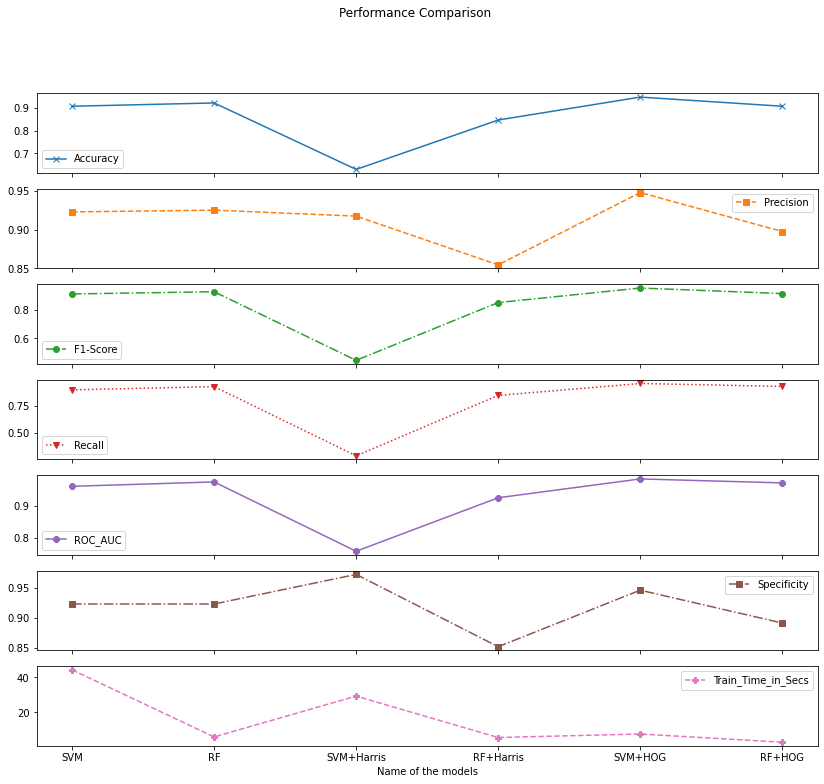

In [159]:
#plotting the results on a graph
model_results_df.plot(rot=0, style=['x-','s--','o-.','v:','8-','s-.', 'P--'], title='Performance Comparison', subplots=True, figsize=(14, 12), xlabel='Name of the models')

# 10. Exporting the selected model

In [160]:
#creating list to store results for each dataset for SVM+HOG approach
svm_results_part1 = [svm_acc_hg_part1, svm_prs_hg_part1, svm_f1_hg_part1, svm_rc_hg_part1, svm_roc_hg_part1, svm_spc_hg_part1, svm_time_hg_part1]
svm_results_part2 = [svm_acc_hg_part2, svm_prs_hg_part2, svm_f1_hg_part2, svm_rc_hg_part2, svm_roc_hg_part2, svm_spc_hg_part2, svm_time_hg_part2]
svm_results_part3 = [svm_acc_hg_part3, svm_prs_hg_part3, svm_f1_hg_part3, svm_rc_hg_part3, svm_roc_hg_part3, svm_spc_hg_part3, svm_time_hg_part3]

In [161]:
#creating the index and column header
part_index = ['SVM+HOG Part1', 'SVM+HOG Part2', 'SVM+HOG Part3']

In [162]:
#choosing the best SVM+HOG model
svm_hg_results_df = pd.DataFrame([svm_results_part1, svm_results_part2, svm_results_part3],
                                columns=metrics_header,
                                index=part_index)

In [163]:
#displaying the results
svm_hg_results_df

,Accuracy,Precision,F1-Score,Recall,ROC_AUC,Specificity,Train_Time_in_Secs
SVM+HOG Part1,0.949757,0.943396,0.950872,0.958466,0.983868,0.940789,8
SVM+HOG Part2,0.951378,0.960912,0.951613,0.942492,0.988103,0.960526,8
SVM+HOG Part3,0.948136,0.940439,0.949367,0.958466,0.987756,0.937500,7


array([[<AxesSubplot:xlabel='Name of the models'>,
        <AxesSubplot:xlabel='Name of the models'>,
        <AxesSubplot:xlabel='Name of the models'>],
       [<AxesSubplot:xlabel='Name of the models'>,
        <AxesSubplot:xlabel='Name of the models'>,
        <AxesSubplot:xlabel='Name of the models'>],
       [<AxesSubplot:xlabel='Name of the models'>,
        <AxesSubplot:xlabel='Name of the models'>,
        <AxesSubplot:xlabel='Name of the models'>]], dtype=object)

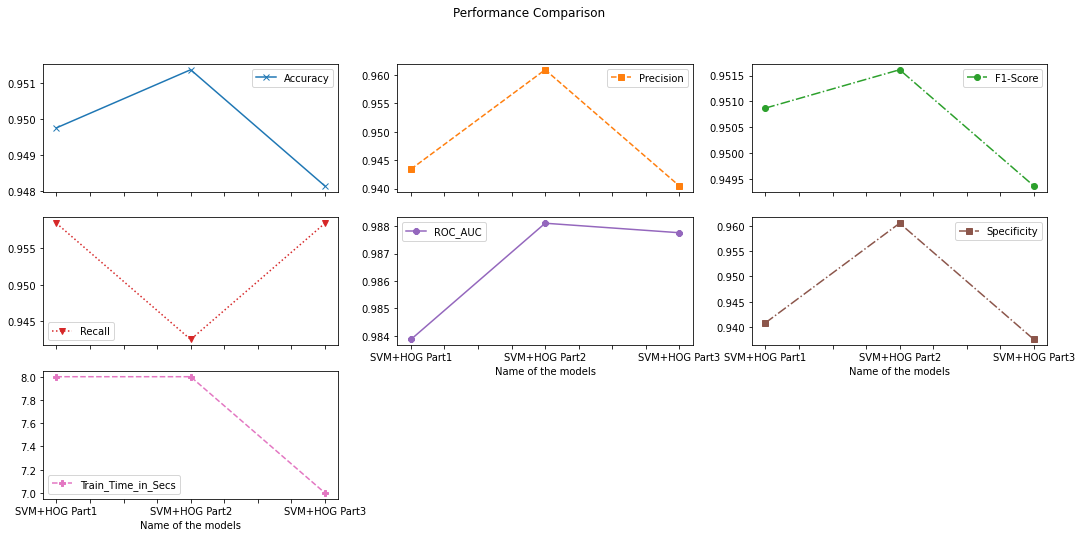

In [164]:
#plotting the results on a graph
svm_hg_results_df.plot(rot=0, style=['x-','s--','o-.','v:','8-','s-.', 'P--'], title='Performance Comparison', subplots=True, figsize=(18, 8), xlabel='Name of the models', layout=(3,3))

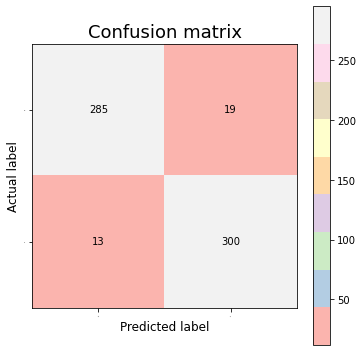

In [172]:
#plotting confusion matrix for the chosen model
selected_model = svm_cf_hg_part2

plt.figure(figsize=(5,5))
plt.imshow(selected_model, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 18)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 2)
plt.yticks(tick_marks, ["0", "1"], size = 2)
plt.tight_layout()
plt.ylabel('Actual label', size = 12)
plt.xlabel('Predicted label', size = 12)
width, height = selected_model.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(selected_model[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center')

In [166]:
#exporting the model file
model_file_name = 'model_SVM_HOG.sav'
pickle.dump(svm_model_hg_part2, open(model_file_name, 'wb'))

In [167]:
#loading the model file
with open(model_file_name, 'rb') as file:  
    svm_hog_model = pickle.load(file)

In [168]:
#getting the model to predict
#against dataset 1
print(svm_hog_model.score(X_test_hg_part1, y_test_hg_part1))
#against dataset 3
print(svm_hog_model.score(X_test_hg_part3, y_test_hg_part3))

0.9448946515397083
0.9416531604538088
